## Data Loading

In [1]:
# Import necessary dependecies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

# Filter the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set up the data path

DATA_PATH = "./data/titanic/train.csv"

In [3]:
# Load the data as Pandas DataFrame

train_df = pd.read_csv("./data/titanic/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Number of rows and columns

train_df.shape

(891, 12)

In [5]:
# Info about dataset columns

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Some descriptive statistical information

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Missing values in the data

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Duplicated values in the data

train_df.duplicated().sum()

0

## Exploratory Data Analysis

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (8, 4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Observation:** It looks like `PassengerId` and `Name` have unique identities for each record, so we'll have to drop them.

### 1. Univariate Analysis

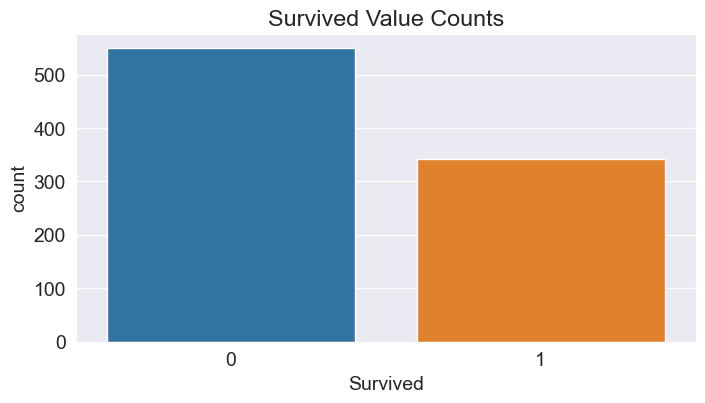

In [11]:
plt.title("Survived Value Counts")

sns.countplot(data=train_df, x="Survived");

**Observation:** The survival count is less than the unsurvived count, which means the dataset is unbalanced.

In [12]:
train_df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

**Observation:** It looks like `Pclass` is a categorical feature.

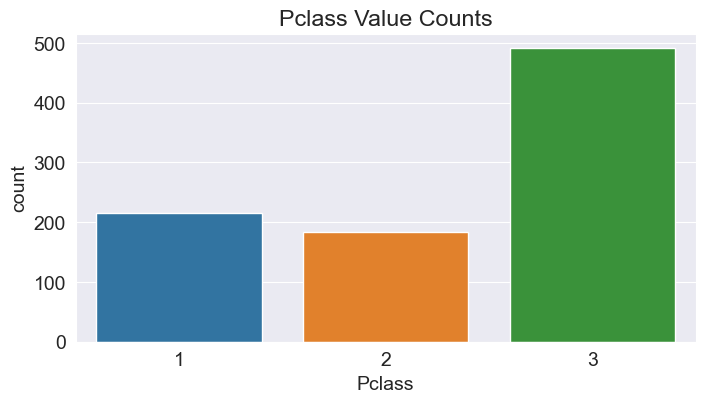

In [13]:
plt.title("Pclass Value Counts")

sns.countplot(data=train_df, x="Pclass");

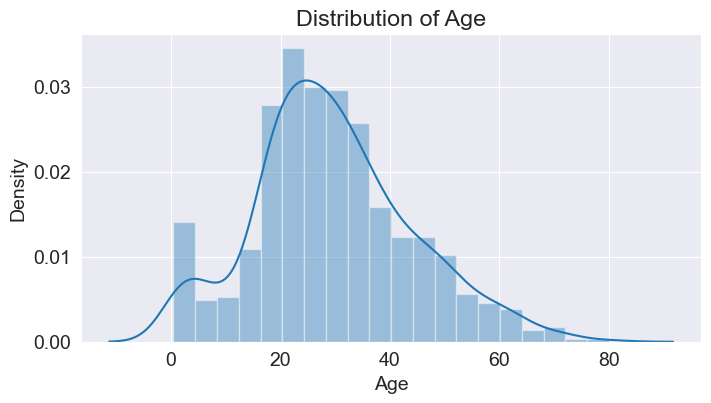

In [14]:
plt.title("Distribution of Age")

sns.distplot(train_df.Age);

**Observation:** It looks a little skewered; we might want to transform it.

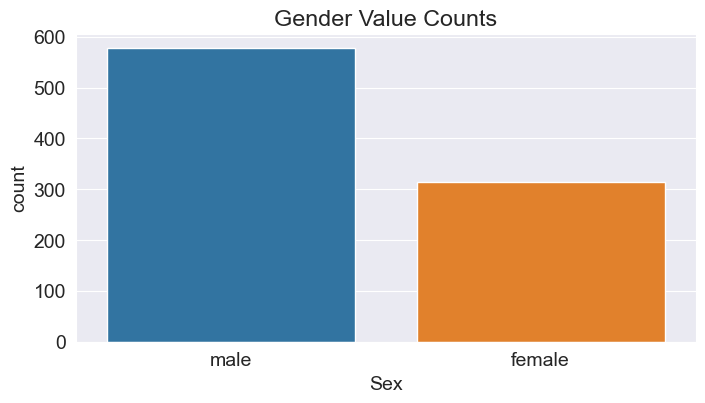

In [15]:
plt.title("Gender Value Counts")

sns.countplot(data=train_df, x="Sex");

In [16]:
train_df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [17]:
train_df.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

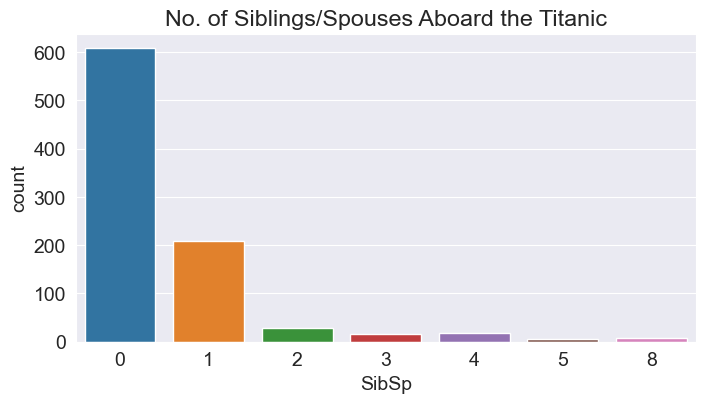

In [18]:
plt.title("No. of Siblings/Spouses Aboard the Titanic")

sns.countplot(data=train_df, x="SibSp");

In [19]:
train_df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [20]:
train_df.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

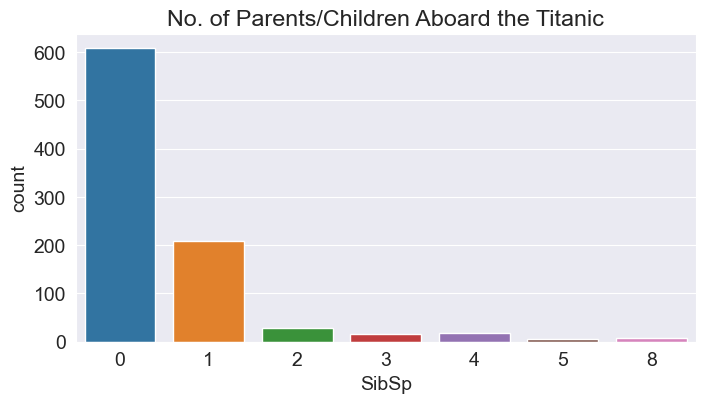

In [21]:
plt.title("No. of Parents/Children Aboard the Titanic")

sns.countplot(data=train_df, x="SibSp");

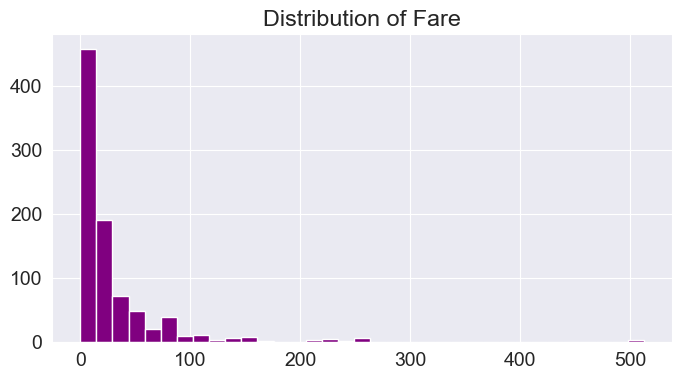

In [22]:
plt.title("Distribution of Fare")

plt.hist(data=train_df, x="Fare", color='purple', bins=35);

In [23]:
# Percentage % of null values in Cabin column

cabin_null_percentage = (train_df['Cabin'].isnull().sum() / len(train_df['Cabin'])) * 100
print(f"Percentage of null values in 'Cabin' column: {cabin_null_percentage:.2f}%")

Percentage of null values in 'Cabin' column: 77.10%


In [24]:
train_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [25]:
train_df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

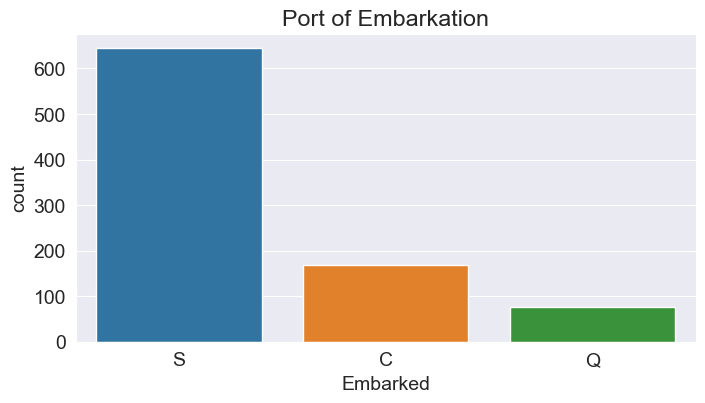

In [26]:
plt.title("Port of Embarkation")

sns.countplot(data=train_df, x='Embarked');

* Q = Queenstown
* S = Southampton
* C = Cherbourg

### 2. Bivariate Analysis

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


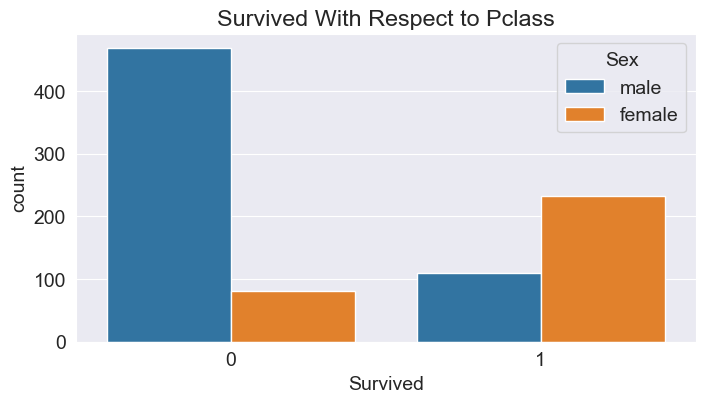

In [28]:
plt.title("Survived With Respect to Pclass")

sns.countplot(data=train_df, x="Survived", hue="Sex");

In [29]:
copy_df = train_df.copy()
copy_df['Survived'] = copy_df['Survived'].astype(str)
copy_df['Survived'].dtype

dtype('O')

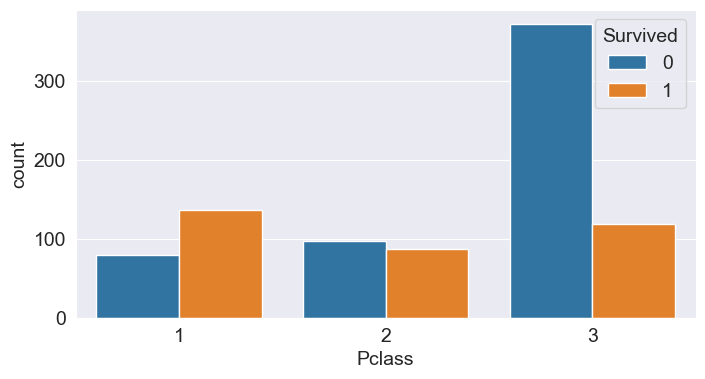

In [31]:
sns.countplot(data=copy_df, x="Pclass", hue="Survived");

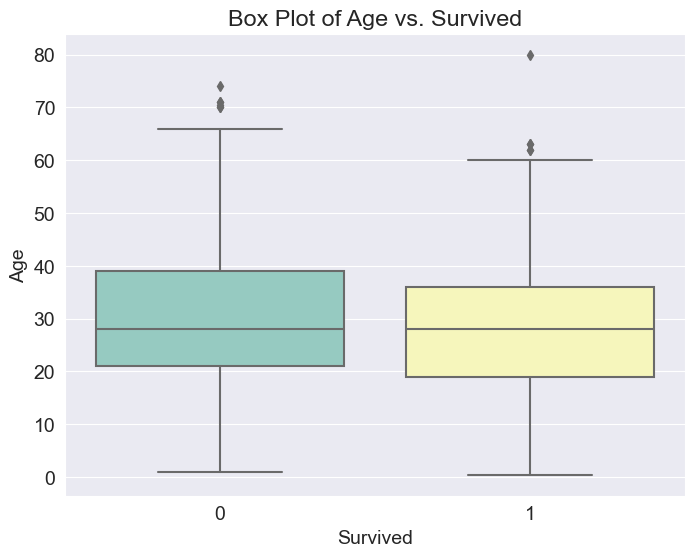

In [43]:
# Create a box plot

plt.figure(figsize=(8, 6))
sns.boxplot(x="Survived", y="Age", data=copy_df, palette="Set3")
plt.title("Box Plot of Age vs. Survived");

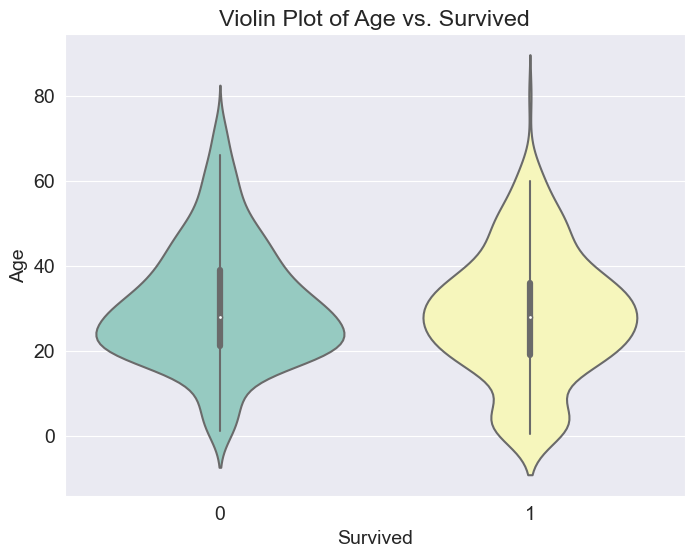

In [44]:
# Create a violin plot

plt.figure(figsize=(8, 6))
sns.violinplot(x="Survived", y="Age", data=copy_df, palette="Set3")
plt.title("Violin Plot of Age vs. Survived");

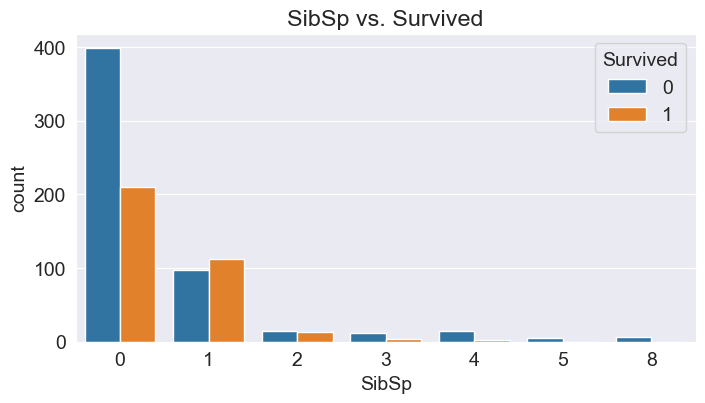

In [47]:
plt.title("SibSp vs. Survived")
sns.countplot(data=copy_df, x="SibSp", hue="Survived");

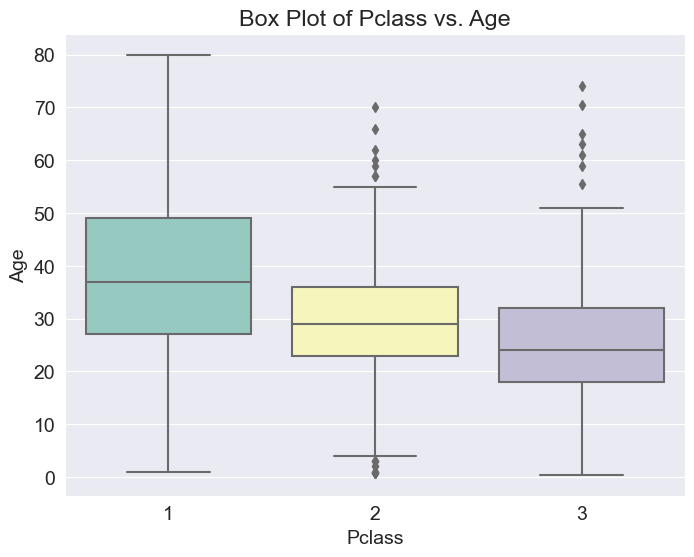

In [48]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Pclass", y="Age", data=copy_df, palette="Set3")
plt.title("Box Plot of Pclass vs. Age");